In [1]:
pwd

'/home/maf15122/Desktop/ML_project'

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as snb 

In [3]:
# Prepare dataset that includes users' information, movies infromation, and ratings 

#dataset 1: rating information  

columns_rating = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('u.data', sep='\t', names=columns_rating, usecols=range(3), encoding="ISO-8859-1")

ratings.head()


,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [4]:
#dataset 2: movie information
columns_movie = ['movie_id', 'title']
movies = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(2), encoding="ISO-8859-1")

movies.head()


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
#merge dataset1 and dataset2
#ratings = pd.merge(movies, ratings)
df=pd.merge(ratings, movies, on='movie_id')
df.head()

,user_id,movie_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [6]:
#dataset 3: user information
# user id | age | gender | occupation | zip code

columns_users=['user_id','age','gender','occupation', 'zip_code']
users=pd.read_csv('u.user',sep='|',names=columns_users)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
merged_data=pd.merge(df, users, on='user_id')

In [8]:
merged_data.head()

,user_id,movie_id,rating,title,age,gender,occupation,zip_code
0,196,242,3,Kolya (1996),49,M,writer,55105
1,196,257,2,Men in Black (1997),49,M,writer,55105
2,196,111,4,"Truth About Cats & Dogs, The (1996)",49,M,writer,55105
3,196,25,4,"Birdcage, The (1996)",49,M,writer,55105
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",49,M,writer,55105


In [9]:
merged_data.shape

(100000, 8)

In [10]:
merged_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [11]:
#create a coulmn for number of rating next to the "rating" column
# which movie has most rating --> "count" command
merged_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [12]:
# create a data frame 
avg_ratings=pd.DataFrame(merged_data.groupby('title')['rating'].mean())
avg_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


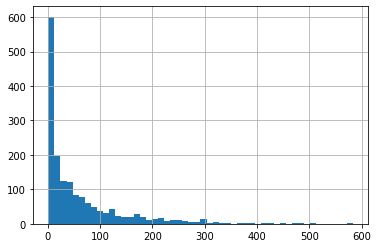

In [13]:
#create a coulmn for number of rating next to the "rating" column
avg_ratings['num of ratings']=pd.DataFrame(merged_data.groupby('title')['rating'].count())
#avg_ratings.head()
avg_ratings['num of ratings'].hist(bins=50)

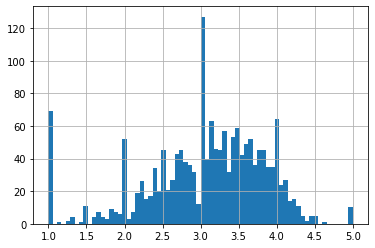

In [14]:
avg_ratings['rating'].hist(bins=70)

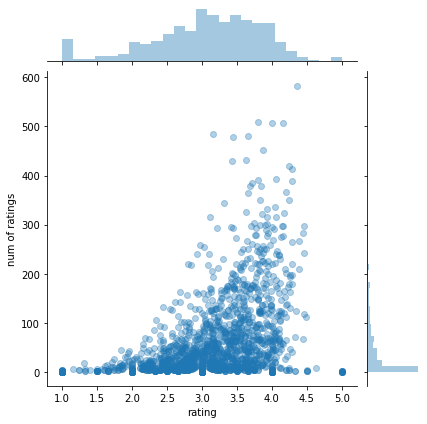

In [15]:
# what the data looks like 
snb.jointplot(x='rating', y='num of ratings', data=avg_ratings, alpha=0.34)

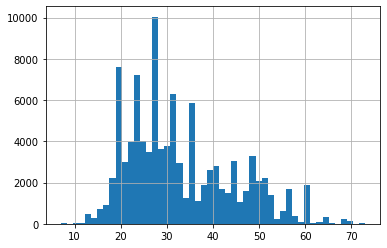

In [16]:
# age of users
merged_data['age'].hist(bins=50)

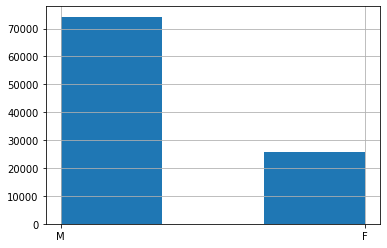

In [17]:
# gender of users
merged_data['gender'].hist(bins=3)

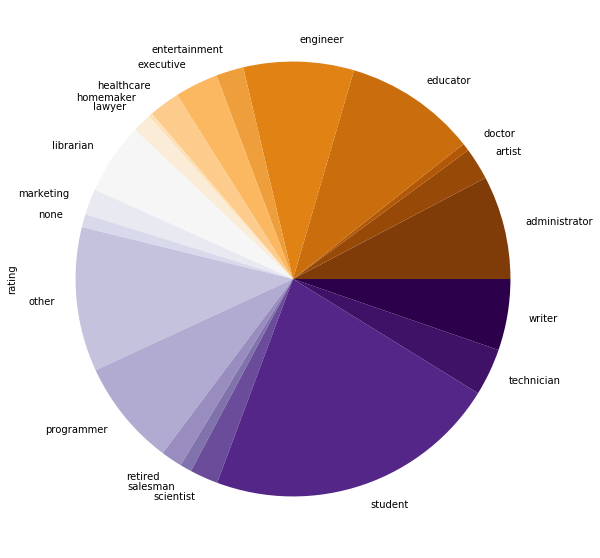

In [18]:
# occupation of users
merged_data.sort_values('rating', ascending=False)
merged_data.groupby(['occupation'])['rating'].sum().plot(
    kind='pie',
    figsize=(15,10),
    cmap=plt.cm.PuOr, 
)

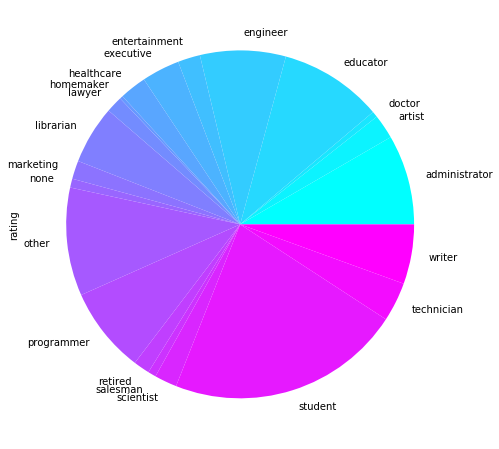

In [19]:
# for color fun!!; it's cool :D
merged_data.sort_values('rating', ascending=False)

merged_data[ratings['rating'] == 1].groupby(
    ['occupation']
)['rating'].sum().plot(
    kind='pie',
    figsize=(12,8),
    cmap=plt.cm.cool, # defaults to orangish
)

In [20]:
#create a matrix that shows users information as well as their rating for whatever they watched
moviemat=merged_data.pivot_table(index='user_id', columns='title', values='rating')

In [21]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [22]:
#this makes the table more fun!! b/c it gives a better picture of each user!

columns_users=['user_id','age','gender','occupation']
user_movie_table=merged_data.pivot_table(index=columns_users, columns='title', values='rating')


In [23]:
user_movie_table.head()

,,,title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,age,gender,occupation,,,,,,,,,,,,,,,,,,,,,
1,24,M,technician,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,53,F,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,M,writer,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,M,technician,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,33,F,other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [27]:
#dataset 3: movie information
columns_movie = ['movie_id', 'title','release_date','VRD','URL','unknown','Action','Adventure','Animation','Children','Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film_Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci_Fi', 'Thriller', 'War', 'Western']
genre = ratings = pd.read_csv('u.item', sep='|', names=columns_movie, usecols=range(24), encoding="ISO-8859-1")
genre.head()

,movie_id,title,release_date,VRD,URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
#final_data includes both users information and movie genre 
final_data=pd.merge(merged_data, genre, on='movie_id')

In [31]:
final_data.head()

,user_id,movie_id,rating,title_x,age,gender,occupation,zip_code,title_y,release_date,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),28,M,student,92103,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),25,M,student,53703,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),45,M,other,73132,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


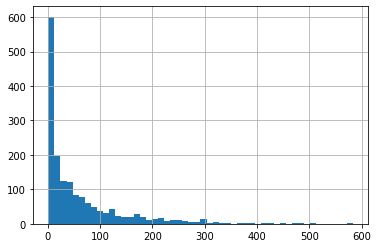

In [46]:
# I just wanted to make sure that merging files work!
# create a data frame 
#mean_ratings=pd.DataFrame(final_data.groupby('title_x')['rating'].mean())
#mean_ratings.head()

#create a coulmn for number of rating next to the "rating" column
mean_ratings['num of ratings']=pd.DataFrame(final_data.groupby('title_x')['rating'].count())
#avg_ratings.head()
mean_ratings['num of ratings'].hist(bins=50)

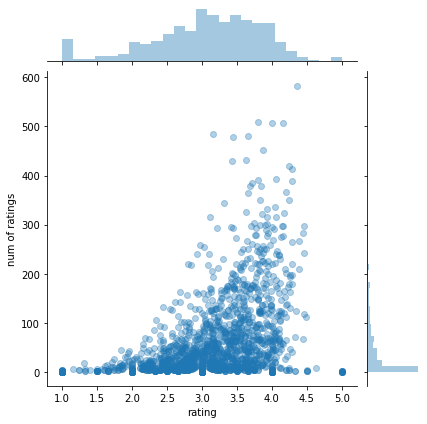

In [84]:
# what the data looks like 
snb.jointplot(x='rating', y='num of ratings', data=mean_ratings, alpha=0.34)

In [63]:
#what is the differenec in rating movies between male and female users?

#splitting a "final_data" on values of categorical variables:
groupby_gender = final_data.groupby('gender')
for gender, value in groupby_gender['rating']:
    print((gender, value.mean()))
    
    
groupby_gender.mean()    

('F', 3.5315073815073816)
('M', 3.5292889846485322)


,user_id,movie_id,rating,age,VRD,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,,,
F,474.985781,444.956449,3.531507,32.314724,NaN,0.000078,0.211422,0.122028,0.038656,0.086713,...,0.014103,0.014957,0.046503,0.056022,0.051049,0.227584,0.102137,0.197591,0.085043,0.014413
M,458.151643,418.796580,3.529289,33.196930,NaN,0.000108,0.271304,0.142903,0.035147,0.066658,...,0.013318,0.018152,0.055481,0.047293,0.052936,0.183181,0.136022,0.226044,0.097078,0.019970


In [64]:
#how does rating movies vary among different occupational groups?
#this table seems more informative!! 
#Awesome Possum!!!

groupby_job = final_data.groupby('occupation')
for occupation, value in groupby_job['rating']:
    print((occupation, value.mean()))
    
groupby_job.mean()    

('administrator', 3.6356464768017114)
('artist', 3.653379549393414)
('doctor', 3.688888888888889)
('educator', 3.6706206312221985)
('engineer', 3.541406727828746)
('entertainment', 3.4410501193317424)
('executive', 3.3491037320011756)
('healthcare', 2.896219686162625)
('homemaker', 3.301003344481605)
('lawyer', 3.7353159851301116)
('librarian', 3.560781338896264)
('marketing', 3.4856410256410255)
('none', 3.779134295227525)
('other', 3.5523773797242804)
('programmer', 3.5682604794257147)
('retired', 3.4667495338719703)
('salesman', 3.582943925233645)
('scientist', 3.611273080660836)
('student', 3.5151432345038027)
('technician', 3.5322304620650313)
('writer', 3.3757225433526012)


,user_id,movie_id,rating,age,VRD,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
occupation,,,,,,,,,,,,,,,,,,,,,
administrator,378.662121,406.161653,3.635646,39.123145,NaN,0.000000,0.248429,0.136382,0.027143,0.061773,...,0.012569,0.019655,0.052280,0.047333,0.051477,0.205776,0.125953,0.209921,0.105094,0.022463
artist,492.750867,429.569324,3.653380,30.592288,NaN,0.000000,0.228769,0.134749,0.052426,0.087522,...,0.010399,0.027730,0.044194,0.068024,0.071057,0.200173,0.133449,0.206239,0.097487,0.012565
doctor,392.690741,438.129630,3.688889,35.592593,NaN,0.000000,0.203704,0.105556,0.040741,0.051852,...,0.012963,0.016667,0.033333,0.050000,0.050000,0.246296,0.103704,0.216667,0.081481,0.009259
educator,417.871849,421.898115,3.670621,42.789240,NaN,0.000106,0.207795,0.119466,0.027854,0.062804,...,0.011862,0.021394,0.044588,0.050943,0.056344,0.212455,0.104427,0.187143,0.106439,0.020017
engineer,491.199755,396.114985,3.541407,34.356086,NaN,0.000122,0.278532,0.158899,0.044404,0.076942,...,0.015291,0.017737,0.050642,0.053945,0.044404,0.179450,0.149358,0.209419,0.104954,0.022018
entertainment,312.376134,442.426253,3.441050,28.766110,NaN,0.000477,0.238186,0.118854,0.029594,0.049642,...,0.011933,0.022434,0.091647,0.032458,0.063007,0.163246,0.137947,0.264439,0.083055,0.012888
executive,413.830444,464.360270,3.349104,36.614164,NaN,0.000294,0.237438,0.128122,0.026741,0.068175,...,0.014693,0.017044,0.045548,0.038495,0.059653,0.173964,0.114899,0.238319,0.091684,0.014399
healthcare,497.511769,568.310628,2.896220,38.885164,NaN,0.000000,0.205777,0.115193,0.031740,0.075963,...,0.013552,0.017832,0.042796,0.044936,0.049929,0.177960,0.094864,0.200785,0.082026,0.016762
homemaker,505.127090,439.862876,3.301003,32.371237,NaN,0.000000,0.307692,0.137124,0.030100,0.083612,...,0.010033,0.013378,0.030100,0.050167,0.107023,0.197324,0.100334,0.317726,0.093645,0.000000


In [62]:
#how does rating movies vary among different age groups?
#groupby_age = final_data.groupby('age')
#for age, value in groupby_age['rating']:
#    print((age, value.mean()))

# better idea: categorize age and then find the answer for each category!    

In [74]:
# run OLS to see if age is an "effective" factor in rating
# also it seems fancy to run OLS :)

#pip install statsmodels --user
from statsmodels.formula.api import ols

model = ols("rating ~ age", final_data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     297.5
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.46e-66
Time:                        12:03:25   Log-Likelihood:            -1.5358e+05
No. Observations:              100000   AIC:                         3.072e+05
Df Residuals:                   99998   BIC:                         3.072e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3551      0.011    312.377      0.0

In [75]:
#comare movies rating of male and female using a linear model

model = ols("rating ~ gender + 1", final_data).fit()
print(model.summary())

#coefficient for "gender[T.M]" means male users tend to rate movies less than female users. However, it is not statistically significant 

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07424
Date:                Tue, 11 Feb 2020   Prob (F-statistic):              0.785
Time:                        12:06:26   Log-Likelihood:            -1.5373e+05
No. Observations:              100000   AIC:                         3.075e+05
Df Residuals:                   99998   BIC:                         3.075e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5315      0.007    503.327      

In [76]:
model = ols("rating ~ age + gender", final_data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     149.1
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           2.22e-65
Time:                        12:10:58   Log-Likelihood:            -1.5358e+05
No. Observations:              100000   AIC:                         3.072e+05
Df Residuals:                   99997   BIC:                         3.072e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3599      0.012    276.299      

In [97]:
#final_data includes both users information and movie genre 
final_data=pd.merge(merged_data, genre, on='movie_id')
gender = {'M': 1,'F': 2} 
final_data.gender[final_data.gender == 'M'] = 1
final_data.gender[final_data.gender == 'F'] = 2
final_data.head()

<ipython-input-97-b247ec67a205>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.gender[final_data.gender == 'M'] = 1
<ipython-input-97-b247ec67a205>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.gender[final_data.gender == 'F'] = 2


,user_id,movie_id,rating,title_x,age,gender,occupation,zip_code,title_y,release_date,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),49,1,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),31,1,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),28,1,student,92103,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),25,1,student,53703,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),45,1,other,73132,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# what gender likes the action movie better?

groupby_action = final_data.groupby('Action')
for gender, value in groupby_action['gender']:
    print((gender, value.mean()))
    
groupby_action.mean()  


(0, 1.2727822499361654)
(1, 1.2126695064285435)


,user_id,movie_id,rating,age,VRD,unknown,Adventure,Animation,Children,Comedy,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
Action,,,,,,,,,,,,,,,,,,,,,
0,460.283977,454.155152,3.546922,33.403260,NaN,0.000134,0.046337,0.046875,0.09375,0.358227,...,0.014460,0.02329,0.054186,0.061147,0.056739,0.198963,0.063996,0.158202,0.065461,0.013520
1,468.884443,342.290594,3.480245,31.709524,NaN,0.000000,0.402712,0.004572,0.00805,0.124116,...,0.010786,0.00000,0.050217,0.015788,0.039978,0.181953,0.311384,0.394701,0.176912,0.033139


In [104]:
final_data['gender'].min()

1

In [105]:
final_data['gender'].max()

2

In [ ]:
#https://datatofish.com/use-pandas-to-calculate-stats-from-an-imported-csv-file/